In [1]:
import pandas as pd

In [2]:
train_df=pd.read_csv('nlp_start/train.csv')
test_df=pd.read_csv('nlp_start/test.csv')

In [3]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [8]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [9]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=3481, text='A Time-Lapse Map of Every Nuclear Explosion Since 1945 - by Isao Hashimoto #War #atomicbomb \nhttps://t.co/V0t8H4Iecc', target=1)
Pandas(Index=1184, text='Two giant cranes holding a bridge collapse into nearby homes http://t.co/lSQe7nu6kl', target=1)
Pandas(Index=2551, text='ng2x5 mhtw4fnet\n\nWatch Michael Jordan absolutely destroy this meme-baiting camper - FOXSportscom', target=0)
Pandas(Index=7057, text="USW: 'The damage from abandoning the deal could well create a new level of uncertainty...economic upheaval &amp; military unrest'", target=0)


In [10]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [11]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [12]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [13]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [14]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [15]:
text_vectorizer.adapt(train_sentences)

In [16]:
sample_sentense="I Love Tensorflow"

text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 107,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [17]:
words = text_vectorizer.get_vocabulary()



In [18]:
from tensorflow.keras.layers import Embedding

In [19]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [20]:
embedding

In [21]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.00376435,  0.04632909,  0.0120484 , ..., -0.00652052,
         0.02468527, -0.00903976],
       [-0.00214593,  0.03408143, -0.0405169 , ..., -0.03836934,
         0.04022226,  0.0170405 ],
       [ 0.03709986,  0.02081803, -0.00888209, ..., -0.03102347,
        -0.03456874,  0.00411992],
       ...,
       [-0.01161356,  0.00865997, -0.00727453, ..., -0.03234718,
        -0.03907821,  0.00183257],
       [-0.01161356,  0.00865997, -0.00727453, ..., -0.03234718,
        -0.03907821,  0.00183257],
       [-0.01161356,  0.00865997, -0.00727453, ..., -0.03234718,
        -0.03907821,  0.00183257]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [27]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [ ]:
model_0.fit(train_sentences,train_labels)

In [30]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [32]:
y_hat0=model_0.predict(test_sentences)

In [33]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64))

In [36]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [37]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

In [40]:
test_sentences.dtype

dtype('O')

In [41]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [42]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [44]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 11s 45ms/step - loss: 0.6117 - accuracy: 0.6974 - val_loss: 0.5178 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.4440 - accuracy: 0.8152 - val_loss: 0.4413 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 9s 41ms/step - loss: 0.3496 - accuracy: 0.8575 - val_loss: 0.4254 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 9s 42ms/step - loss: 0.2861 - accuracy: 0.8899 - val_loss: 0.4327 - val_accuracy: 0.7992
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.2385 - accuracy: 0.9149 - val_loss: 0.4397 - val_accuracy: 0.8045


In [46]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8045


[0.43967223167419434, 0.8044619560241699]

In [49]:
res_model_1=pd.DataFrame(model_1_history.history)

<AxesSubplot:>

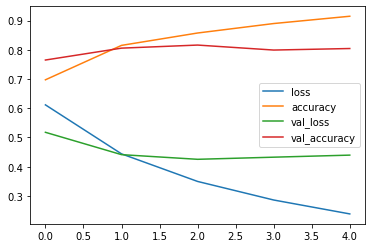

In [50]:
res_model_1.plot()

In [53]:
test_labels.shape

(762,)

In [54]:
y_hat1=model_1.predict(test_sentences)

In [66]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [ ]:
test_labels

In [67]:
calculate_results(test_labels,y_hat1)

{'accuracy': 80.4461942257218,
 'precision': 0.8046654470037916,
 'recall': 0.8044619422572179,
 'f1': 0.8015909060887716}

In [68]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}